In [101]:
from langchain_core.messages.chat import ChatMessage
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.prompts import load_prompt 
from dotenv import load_dotenv
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough,RunnableLambda
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from utils.utils import set_model,setstate
import tempfile
import os 
from dotenv import load_dotenv
load_dotenv()

True

In [7]:
from langchain_community.utilities import SerpAPIWrapper

parm = {'engine':'google', 'gl':'kr', 'h':'ko', 'num':'2'}

search = SerpAPIWrapper(params=parm)



In [8]:
search 

SerpAPIWrapper(search_engine=<class 'serpapi.google_search.GoogleSearch'>, params={'engine': 'google', 'gl': 'kr', 'h': 'ko', 'num': '2'}, serpapi_api_key='78652c8362f1d03c76325b9fc1141e04d3d92e24b4eec941c46242e9046c7681', aiosession=None)

In [10]:
result = search.run('ICT공학')

### 쉽게 리스트로 변환이 가능 

In [11]:
result = eval(result)
result

['ICT는 Information Communications Technologies의 약자입니다. ICT공학과는 정보 기술(Information Technology)과. 통신 기술(Communication Technology) ...',
 '컴퓨터공학, 수학, 통계학 등 관련 분야에 대한 기본 지식과 컴퓨팅 사고를 바탕으로 한 프로그래밍 능력을 집중적으로 교육하고 있습니다. 세부적 ...']

In [39]:
from langchain_openai import ChatOpenAI
from langchain_core.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

# LM Studio 연결 설정 (올바른 방법)
llm = ChatOpenAI(
    base_url="http://127.0.0.1:1234/v1",  # /v1 엔드포인트 추가
    api_key="not-needed",  # LM Studio는 보통 API 키가 필요없음
    model="qwen3-1.7b",  # 모델명을 model 파라미터로 지정
    temperature=0.7,
    streaming=True,
    callbacks=[StreamingStdOutCallbackHandler()]
)




In [44]:
pt = PromptTemplate(
    template='''\no_think {question}''',
    input_variables=['question']  # 오타 수정: 'qeustion' -> 'question'
)


In [45]:
chain = pt|llm|StrOutputParser()

In [46]:
chain.invoke({"question":'당신은 누구인가요?'})


<think>
Okay, the user asked, "Who are you?" Let me think about how to answer that.

First, I need to introduce myself. My name is Qwen, right? And I'm a large language model developed by Alibaba Cloud. But wait, maybe I should mention my main functions and capabilities to give them a clear picture.

I should explain that I can help with various tasks like answering questions, writing text, coding, and more. It's important to highlight that I'm designed to be helpful and friendly, but also emphasize that I shouldn't replace real people or medical advice.

Wait, the user might be testing my knowledge. I need to make sure I don't miss any key points. Let me check if there are any specific details I should include. Maybe mention that I can understand and generate Chinese text, which is useful for users in China.

Also, I should remind them not to rely solely on me for important decisions. That's a good ethical point. Alright, putting it all together in a friendly and informative way.
</th

'<think>\nOkay, the user asked, "Who are you?" Let me think about how to answer that.\n\nFirst, I need to introduce myself. My name is Qwen, right? And I\'m a large language model developed by Alibaba Cloud. But wait, maybe I should mention my main functions and capabilities to give them a clear picture.\n\nI should explain that I can help with various tasks like answering questions, writing text, coding, and more. It\'s important to highlight that I\'m designed to be helpful and friendly, but also emphasize that I shouldn\'t replace real people or medical advice.\n\nWait, the user might be testing my knowledge. I need to make sure I don\'t miss any key points. Let me check if there are any specific details I should include. Maybe mention that I can understand and generate Chinese text, which is useful for users in China.\n\nAlso, I should remind them not to rely solely on me for important decisions. That\'s a good ethical point. Alright, putting it all together in a friendly and infor

In [43]:
# 엔드포인트 확인해보기
import requests

# LM Studio가 실행 중이라면 이 요청들을 테스트해볼 수 있습니다
try:
    # 1. 기본 주소 (웹 UI)
    response1 = requests.get("http://127.0.0.1:1234/")
    print("기본 주소 상태:", response1.status_code)
    
    # 2. API 엔드포인트 
    response2 = requests.get("http://127.0.0.1:1234/v1/models")
    print("API 엔드포인트 상태:", response2.status_code)
    print("사용 가능한 모델들:", response2.json())
    
except Exception as e:
    print("LM Studio가 실행되지 않았거나 서버가 시작되지 않았습니다:", e)


기본 주소 상태: 200
API 엔드포인트 상태: 200
사용 가능한 모델들: {'data': [{'id': 'qwen3-1.7b', 'object': 'model', 'owned_by': 'organization_owner'}, {'id': 'text-embedding-nomic-embed-text-v1.5', 'object': 'model', 'owned_by': 'organization_owner'}], 'object': 'list'}


In [ ]:
# LM Studio API 엔드포인트들 설명

"""
LM Studio가 제공하는 API 엔드포인트들:

1. GET /v1/models
   - 목적: 사용 가능한 모델 목록 조회
   - HTTP 메소드: GET (데이터 조회용)
   - 예시: "어떤 모델들이 로드되어 있나요?"

2. POST /v1/chat/completions  
   - 목적: 채팅 형식으로 대화 (ChatGPT 스타일)
   - HTTP 메소드: POST (데이터 전송용)
   - 예시: "안녕하세요, 파이썬에 대해 알려주세요"

3. POST /v1/completions
   - 목적: 텍스트 자동완성 (옛날 GPT-3 스타일)
   - HTTP 메소드: POST (데이터 전송용)  
   - 예시: "파이썬은..." → "파이썬은 프로그래밍 언어입니다"

4. POST /v1/embeddings
   - 목적: 텍스트를 벡터로 변환 (RAG용)
   - HTTP 메소드: POST (데이터 전송용)
   - 예시: "안녕하세요" → [0.1, 0.5, -0.2, ...]
"""

# 실제 사용 예시
import requests
import json


In [ ]:
# 각 엔드포인트 실제 테스트해보기

def test_lm_studio_endpoints():
    base_url = "http://127.0.0.1:1234"
    
    print("=== LM Studio 엔드포인트 테스트 ===\n")
    
    # 1. GET /v1/models - 모델 목록 조회
    try:
        response = requests.get(f"{base_url}/v1/models")
        print("1. 모델 목록 조회 (GET /v1/models):")
        print(f"   상태: {response.status_code}")
        if response.status_code == 200:
            models = response.json()
            print(f"   로드된 모델들: {[m['id'] for m in models['data']]}")
        print()
    except Exception as e:
        print(f"   에러: {e}\n")
    
    # 2. POST /v1/chat/completions - 채팅
    try:
        chat_data = {
            "model": "qwen3-1.7b",  # 실제 모델명으로 변경하세요
            "messages": [
                {"role": "user", "content": "안녕하세요! 간단히 인사해주세요."}
            ],
            "max_tokens": 50
        }
        
        response = requests.post(
            f"{base_url}/v1/chat/completions",
            headers={"Content-Type": "application/json"},
            json=chat_data
        )
        
        print("2. 채팅 (POST /v1/chat/completions):")
        print(f"   상태: {response.status_code}")
        if response.status_code == 200:
            result = response.json()
            print(f"   응답: {result['choices'][0]['message']['content']}")
        print()
        
    except Exception as e:
        print(f"   에러: {e}\n")

# 함수 실행 (LM Studio가 실행 중일 때만)
# test_lm_studio_endpoints()


### llm 캐쉬하기

In [71]:
from langchain.cache import InMemoryCache
from langchain.globals import set_llm_cache

llm = set_model()
set_llm_cache(InMemoryCache())
answer = llm.invoke('사랑이란 무엇일까요?')
answer

AIMessage(content='사랑이란 사람들 사이에서 깊은 감정과 연민, 이해와 배려를 바탕으로 하는 특별한 감정을 말합니다. 이는 서로를 아끼고 존중하며, 함께하는 시간 속에서 행복과 위로를 느끼게 하는 힘이기도 합니다. 사랑은 가족, 친구, 연인 등 다양한 관계에서 나타날 수 있으며, 각 사람에게 다르게 다가올 수 있지만, 공통적으로 따뜻함과 연결감을 주는 중요한 인간의 감정입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 107, 'prompt_tokens': 15, 'total_tokens': 122, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BjyfuYfpHANyJF0zMmeDcFo8sjx22', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--5f476e09-973f-4a16-ba3a-fd848358b2b6-0', usage_metadata={'input_tokens': 15, 'output_tokens': 107, 'total_tokens': 122, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning':

### 0초 레전드

In [72]:
answer = llm.invoke('사랑이란 무엇일까요?')
answer

AIMessage(content='사랑이란 사람들 사이에서 깊은 감정과 연민, 이해와 배려를 바탕으로 하는 특별한 감정을 말합니다. 이는 서로를 아끼고 존중하며, 함께하는 시간 속에서 행복과 위로를 느끼게 하는 힘이기도 합니다. 사랑은 가족, 친구, 연인 등 다양한 관계에서 나타날 수 있으며, 각 사람에게 다르게 다가올 수 있지만, 공통적으로 따뜻함과 연결감을 주는 중요한 인간의 감정입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 107, 'prompt_tokens': 15, 'total_tokens': 122, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BjyfuYfpHANyJF0zMmeDcFo8sjx22', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--5f476e09-973f-4a16-ba3a-fd848358b2b6-0', usage_metadata={'input_tokens': 15, 'output_tokens': 107, 'total_tokens': 122, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning':

### sqlite로 저장해서 쓸 수도 있다~

In [76]:
from langchain.cache import SQLiteCache
from langchain.globals import set_llm_cache

set_llm_cache(SQLiteCache(database_path = r'C:\Users\roaco\Desktop\프로젝트들 정리하기\github\answer_db\langchain.db'))
answer = llm.invoke('메이플이란 무엇일까요?')
answer

AIMessage(content='메이플은 주로 "메이플스토리"라는 온라인 캐주얼 MMORPG(대규모 다중 사용자 온라인 역할 수행 게임)를 가리키는 말입니다. 메이플스토리는 넥슨이 개발하고 서비스하는 게임으로, 2003년에 처음 출시되었으며, 귀여운 그래픽과 다양한 캐릭터, 퀘스트, 몬스터, 아이템 등을 특징으로 합니다. 플레이어는 다양한 직업군 중 하나를 선택하여 캐릭터를 성장시키고, 친구들과 함께 파티를 구성하거나 길드 활동을 즐기며 게임 세계를 탐험할 수 있습니다. \n\n이 외에도 "메이플"이라는 단어는 메이플 나무(단풍나무) 또는 메이플 시럽 등 다른 의미로도 사용될 수 있지만, 일반적으로는 온라인 게임 "메이플스토리"를 의미하는 경우가 많습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 195, 'prompt_tokens': 16, 'total_tokens': 211, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BjyutNJ6TRxBlIsmJM68qUhvyvM5R', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--2c0500d5-4981-42e9-96c2-078bad97aa50-0', usage_metadata={'input_tokens'

In [77]:
answer = llm.invoke('메이플이란 무엇일까요?')
answer

AIMessage(content='메이플은 주로 "메이플스토리"라는 온라인 캐주얼 MMORPG(대규모 다중 사용자 온라인 역할 수행 게임)를 가리키는 말입니다. 메이플스토리는 넥슨이 개발하고 서비스하는 게임으로, 2003년에 처음 출시되었으며, 귀여운 그래픽과 다양한 캐릭터, 퀘스트, 몬스터, 아이템 등을 특징으로 합니다. 플레이어는 다양한 직업군 중 하나를 선택하여 캐릭터를 성장시키고, 친구들과 함께 파티를 구성하거나 길드 활동을 즐기며 게임 세계를 탐험할 수 있습니다. \n\n이 외에도 "메이플"이라는 단어는 메이플 나무(단풍나무) 또는 메이플 시럽 등 다른 의미로도 사용될 수 있지만, 일반적으로는 온라인 게임 "메이플스토리"를 의미하는 경우가 많습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 195, 'prompt_tokens': 16, 'total_tokens': 211, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BjyutNJ6TRxBlIsmJM68qUhvyvM5R', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--2c0500d5-4981-42e9-96c2-078bad97aa50-0', usage_metadata={'input_tokens'

### 직렬화하기, 저장가능한 형식으로 모델을 저장하는 목적

In [79]:
pt = PromptTemplate(
    template=''' {question}은 무엇인가요? '''
    , input_variables = ['question']
)



### 직렬화 여부 체크하기

In [83]:
print(ChatOpenAI.is_lc_serializable())
print(pt.is_lc_serializable())
chain = pt | llm 
print(chain.is_lc_serializable())


True
True
True


### 체인이 이뤄지는 요소는 디게 많잖슴, 이때 이러한 정보를 다 쭉 넣고 직렬화를 시켜두면 딕셔너리타입으로 나옴

In [84]:
from langchain_core.load import dumpd, dumps 

dumps_chain = dumpd(chain)
dumps_chain

{'lc': 1,
 'type': 'constructor',
 'id': ['langchain', 'schema', 'runnable', 'RunnableSequence'],
 'kwargs': {'first': {'lc': 1,
   'type': 'constructor',
   'id': ['langchain', 'prompts', 'prompt', 'PromptTemplate'],
   'kwargs': {'input_variables': ['question'],
    'template': ' {question}은 무엇인가요? ',
    'template_format': 'f-string'},
   'name': 'PromptTemplate'},
  'last': {'lc': 1,
   'type': 'constructor',
   'id': ['langchain', 'chat_models', 'openai', 'ChatOpenAI'],
   'kwargs': {'model_name': 'gpt-4.1-nano-2025-04-14',
    'temperature': 0.2,
    'openai_api_key': {'lc': 1, 'type': 'secret', 'id': ['OPENAI_API_KEY']}},
   'name': 'ChatOpenAI'}},
 'name': 'RunnableSequence'}

In [85]:
type(dumps_chain)

dict

### dumps는 그냥 문자열로 저장함 

In [86]:
str_chain = dumps(chain)
str_chain

'{"lc": 1, "type": "constructor", "id": ["langchain", "schema", "runnable", "RunnableSequence"], "kwargs": {"first": {"lc": 1, "type": "constructor", "id": ["langchain", "prompts", "prompt", "PromptTemplate"], "kwargs": {"input_variables": ["question"], "template": " {question}\\uc740 \\ubb34\\uc5c7\\uc778\\uac00\\uc694? ", "template_format": "f-string"}, "name": "PromptTemplate"}, "last": {"lc": 1, "type": "constructor", "id": ["langchain", "chat_models", "openai", "ChatOpenAI"], "kwargs": {"model_name": "gpt-4.1-nano-2025-04-14", "temperature": 0.2, "openai_api_key": {"lc": 1, "type": "secret", "id": ["OPENAI_API_KEY"]}}, "name": "ChatOpenAI"}}, "name": "RunnableSequence"}'

In [87]:
type(str_chain)

str

### pcikle은 파이썬객체를 바이너리 형태로 직렬화하는 포맷인데 이거 써서 할거읾... 대신 다른언어랑 호환은 안됨 역직렬화시엔 주의해야함 보안적 요소~

In [88]:
import pickle 

with open('answer_chain.pkl','wb') as f:
    pickle.dump(dumps_chain,f)
    

### 실행을 안할 거지만 json도 마찬가지로 저장가능하다~

In [91]:
import json 
with open('answer_chain.json', 'w') as fp:
    json.dump(dumps_chain, fp)


### 불러오기 

In [92]:
import pickle 

with open('answer_chain.pkl','rb') as f:
    load_chain = pickle.load(f)
load_chain

{'lc': 1,
 'type': 'constructor',
 'id': ['langchain', 'schema', 'runnable', 'RunnableSequence'],
 'kwargs': {'first': {'lc': 1,
   'type': 'constructor',
   'id': ['langchain', 'prompts', 'prompt', 'PromptTemplate'],
   'kwargs': {'input_variables': ['question'],
    'template': ' {question}은 무엇인가요? ',
    'template_format': 'f-string'},
   'name': 'PromptTemplate'},
  'last': {'lc': 1,
   'type': 'constructor',
   'id': ['langchain', 'chat_models', 'openai', 'ChatOpenAI'],
   'kwargs': {'model_name': 'gpt-4.1-nano-2025-04-14',
    'temperature': 0.2,
    'openai_api_key': {'lc': 1, 'type': 'secret', 'id': ['OPENAI_API_KEY']}},
   'name': 'ChatOpenAI'}},
 'name': 'RunnableSequence'}

In [93]:
import json 
with open('answer_chain.json', 'r') as f:
    load_json = json.load(f)
load_json

{'lc': 1,
 'type': 'constructor',
 'id': ['langchain', 'schema', 'runnable', 'RunnableSequence'],
 'kwargs': {'first': {'lc': 1,
   'type': 'constructor',
   'id': ['langchain', 'prompts', 'prompt', 'PromptTemplate'],
   'kwargs': {'input_variables': ['question'],
    'template': ' {question}은 무엇인가요? ',
    'template_format': 'f-string'},
   'name': 'PromptTemplate'},
  'last': {'lc': 1,
   'type': 'constructor',
   'id': ['langchain', 'chat_models', 'openai', 'ChatOpenAI'],
   'kwargs': {'model_name': 'gpt-4.1-nano-2025-04-14',
    'temperature': 0.2,
    'openai_api_key': {'lc': 1, 'type': 'secret', 'id': ['OPENAI_API_KEY']}},
   'name': 'ChatOpenAI'}},
 'name': 'RunnableSequence'}

### 이렇게 로드하면 되는데 바로 모델 부르네? 엮인거 전부 제이슨으로 잘 저장해서 불러오는 걸 알았다~

In [94]:
from langchain_core.load import load

chain_from = load(load_chain)

chain_from.invoke({'question':'메이플'})

C:\Users\roaco\AppData\Local\Temp\ipykernel_17912\2609559767.py:3: LangChainBetaWarning: The function `load` is in beta. It is actively being worked on, so the API may change.
  chain_from = load(load_chain)


AIMessage(content='메이플은 대한민국의 온라인 게임인 "메이플스토리"를 줄여 부르는 말입니다. 메이플스토리(MapleStory)는 넥슨이 개발하고 서비스하는 2D 사이드 스크롤 MMORPG(대규모 다중 사용자 온라인 역할 수행 게임)로, 2003년 처음 출시되었습니다. 이 게임은 귀여운 캐릭터와 다양한 직업, 방대한 퀘스트, 커뮤니티 요소로 많은 인기를 끌었으며, 전 세계적으로 많은 팬을 보유하고 있습니다. 플레이어는 다양한 캐릭터를 육성하며 몬스터를 사냥하거나 아이템을 수집하는 등 여러 활동을 즐길 수 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 150, 'prompt_tokens': 16, 'total_tokens': 166, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BjzKVw0WavQNsuXzgzgPmQm21bfDY', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--45fa6b99-44d1-475a-86f7-da4bb6a70e29-0', usage_metadata={'input_tokens': 16, 'output_tokens': 150, 'total_tokens': 166, 'input_token_details': {'

### 토큰 사용량 보기 

In [95]:
from langchain.callbacks import get_openai_callback 

with get_openai_callback() as cb:
    result = llm.invoke('대한민국의 수도는 어디야?')
    print(cb)


Tokens Used: 23
	Prompt Tokens: 15
		Prompt Tokens Cached: 0
	Completion Tokens: 8
		Reasoning Tokens: 0
Successful Requests: 1
Total Cost (USD): $4.700000000000001e-06


### 제미니도 한번 써보자

In [99]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model = 'gemini-2.0-flash', temperature=0.8)

answer = llm.stream('사랑이란 뭔지 설명해줘')

for token in answer:
    print(token.content, end = '' , flush= True)


사랑은 참 복잡하고 다층적인 감정이라 한마디로 정의하기는 어렵지만, 여러 측면에서 설명해 볼 수 있을 것 같아요. 

**1. 감정적 측면:**

*   **애정:** 누군가에게 깊은 애착을 느끼고, 그 사람을 소중하게 생각하며 아끼는 마음입니다.
*   **헌신:** 상대방을 위해 기꺼이 희생하고 헌신하려는 마음입니다. 어려움 속에서도 함께하고 지지하며, 상대방의 행복을 우선시하는 태도를 보입니다.
*   **공감:** 상대방의 감정을 이해하고 함께 느끼는 능력입니다. 기쁨과 슬픔을 함께 나누고, 어려움을 겪을 때 진심으로 공감하며 위로합니다.
*   **존경:** 상대방의 인격, 가치관, 능력 등을 존중하고 존경하는 마음입니다. 상호 존중은 건강한 관계의 중요한 기반이 됩니다.
*   **끌림:** 육체적, 정신적으로 서로에게 끌리는 감정입니다. 설렘과 두근거림을 느끼고, 함께 시간을 보내고 싶어 합니다.

**2. 행동적 측면:**

*   **돌봄:** 상대방을 보살피고 챙기는 행동입니다. 필요한 것을 제공하고, 어려움을 겪을 때 도움을 주며, 편안함을 느낄 수 있도록 배려합니다.
*   **지지:** 상대방의 꿈과 목표를 응원하고 지지하는 행동입니다. 용기를 북돋아주고, 어려움을 극복할 수 있도록 격려하며, 성공을 함께 기뻐합니다.
*   **소통:** 솔직하고 진솔하게 마음을 나누는 행동입니다. 서로의 생각과 감정을 공유하고, 오해를 풀고, 갈등을 해결해 나갑니다.
*   **함께하는 시간:** 함께 시간을 보내고 추억을 만드는 행동입니다. 데이트를 하거나, 취미를 공유하거나, 여행을 떠나는 등 다양한 활동을 통해 관계를 돈독하게 합니다.
*   **인정:** 상대방의 존재를 인정하고 가치를 부여하는 행동입니다. 칭찬과 격려를 아끼지 않고, 작은 부분이라도 고마움을 표현하며, 상대방의 노력을 알아줍니다.

**3. 사랑의 종류:**

사랑은 대상과 관계의 특성에 따라 다양한 형태로 나타납니다.

*   **자기애 (Self-love):** 자신을 사

### 로컬 모델 호스팅하기

In [105]:
from langchain_huggingface import HuggingFaceEndpoint

# 사용할 모델의 저장소 ID를 설정합니다.
repo_id = "microsoft/Phi-3-mini-4k-instruct"

llm = HuggingFaceEndpoint(
    repo_id=repo_id,  # 모델 저장소 ID를 지정합니다.
    max_new_tokens=256,  # 생성할 최대 토큰 길이를 설정합니다.
    temperature=0.1,
    task="text-generation",
    huggingfacehub_api_token=os.environ["HUGGINGFACEHUB_API_TOKEN"],  # 허깅페이스 토큰
)

prompt = PromptTemplate.from_template('{question}에 대해서 한국어로 답변해주세요')
# LLMChain을 초기화하고 프롬프트와 언어 모델을 전달합니다.
chain = prompt | llm | StrOutputParser()
# 질문을 전달하여 LLMChain을 실행하고 결과를 출력합니다.
response = chain.invoke({"question": "what is the capital of South Korea?"})
print(response)

### 이건 돈써야해서 안해봤는데 그냥 허깅페이스 들어가서 디플로이 누르면 aws 빌려서 하는 거 대신 해서 서버 열어주고 api 연동 편하다 정도로 끝

In [107]:
원래_엔드포인트_주소값이여야함_이거_서버대여해야해서_미안한데_알아서빌려주셈='원래라면주소여야한다니까'

llm = HuggingFaceEndpoint(
    endpoint_url=원래_엔드포인트_주소값이여야함_이거_서버대여해야해서_미안한데_알아서빌려주셈,
    max_new_tokens=512,
    temperature= 0,
    task='text-generation',
)
#이뒤는 알제???

### ggev 파일을 원하는 걸 받으셈 이후에 그걸 폴더에 넣고, modelfile를 설정하면됨 ollama는!  gguf여도 상관없을거임

### 여기서는 양식을 어떻게 지정하는지를 정의할거임, 왜? 다운받는거 솔직히 그냥 cmd 열어서 ollama run 니가원하는모델 하는게 더 빠르고 편리하고 알잘딱깔센인데 이 경우가 아닌 경우 특히 , qwen3같이 현재 기준으로 나온지 얼마안됐다면 이놈들이 걍 템플릿이 없는 경우가 있어서 커스텀하기 불편함, 이경우를 위해 적어둘거임/

### 그럼에도 불구하고 어느 모델이든 누군가 올렷다면 그 모델에 알맞게 템플릿파일은 보통 공유가 돼 있으니 작성해보자 

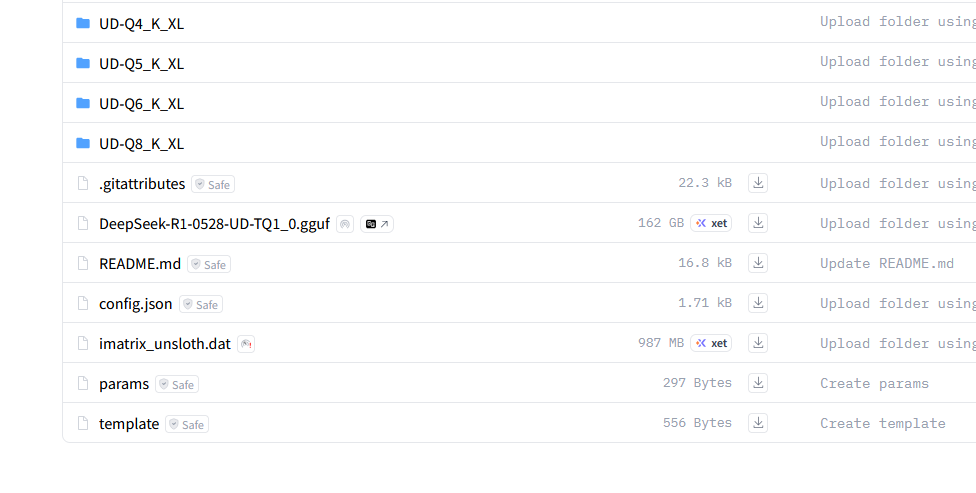

In [108]:
from IPython.display import Image
Image(r"C:\Users\roaco\Desktop\potho\Screenshots\2025-06\firefox_f9qnxPgNqa.png")

### 예를 들어 r1이면 템플릿 파일이 저기 있음 

{{- if .System }}{{ .System }}{{ end }}
{{- range $i, $_ := .Messages }}
{{- $last := eq (len (slice $.Messages $i)) 1}}
{{- if eq .Role "user" }}<｜User｜>{{ .Content }}
{{- else if eq .Role "assistant" }}<｜Assistant｜>
  {{- if and $.IsThinkSet (and $last .Thinking) -}}
<think>
{{ .Thinking }}
</think>
{{- end }}{{ .Content }}{{- if not $last }}<｜end▁of▁sentence｜>{{- end }}
{{- end }}
{{- if and $last (ne .Role "assistant") }}<｜Assistant｜>
{{- if and $.IsThinkSet (not $.Think) -}}
<think>

</think>

{{ end }}
{{- end -}}
{{- end }}

#### 저렇게 작성돼 있는 걸 보면 얘네가 학습을 어떻게 시켰는지 템플릿이 나와있는거임~ 시스템넣고, 엔드 토큰, 메세지 넣고, 유저일때 입력넣고 이런식으로 학습이 진행됐다는 걸 알 수 있음 이러한 것을 ollama에 맞게 변경해주면 되는 것, 근데 사실 기다리면 어차피 올라오긴 해서 큰 의미는 없을지도??

저기 없는 건 
PARAMETER stop <s>
PARAMETER stop </s>

이정도인데 이러한 스페셜 토큰이 없으면 막 계속 죽을 때 까지 생성하도록 ollama는 그런걸로 아는데 그것땜에 이러한 modelfile을 생성해서 관리하는 편, 커스텀이 필요없거나, 이미 잘 돼 있는 모델의 경우에는 필요가 없음 

### 그렇게 해서 잘 만들었으면 이렇게 쓰면된다

In [115]:
from langchain_community.chat_models import ChatOllama

llm = ChatOllama(model = 'qwen3:0.6b')

prmpt = PromptTemplate(
    template='{question}에 대해서 설명해줘',
    input_variables=['question'],
)

chain = prmpt | llm 
answer = chain.stream({'question':'진동'})
for token in answer:
    print(token.content, end = '', flush=True)


<think>
Okay, the user is asking for a description of vibration. Let me start by explaining what vibration means in general. I should mention it's a physical phenomenon that occurs in objects moving or changing. Maybe include examples like a pendulum or a spring. I need to explain the different types of vibrations, like harmonic and forced vibrations. Also, mention applications in technology and everyday life. Keep it simple and clear, avoiding technical jargon. Make sure to highlight how vibration is important in various fields.
</think>

진동은 물리적으로 기존 상태를 유지하는 데 따라 자동으로 전환되는 운동이나 상태를 말합니다. 진동은 물리적 요소(예: 구조물, 시스템, 시스템)에 의해 자동으로 발생하는 흐름이나 변동을 말합니다. 

### 진동의 기본 개념
- **건강 진동**: 기존 상태를 유지하면서 자동으로 전환되는 진동.
- **유발 진동**: 외부 요인(예: 힙, 압력)으로 인해 발생하는 진동.

### 진동의 유형
1. **기존 진동**: 자동으로 전환되는 진동 (예: 봄 시기, 빛이 빛나는 시점).
2. **유발 진동**: 외부 요인에 의해 발생하는 진동 (예: 힙, 압력).

### 진동의 은의
- **기존 진동**: 자동으로 전환되는 운동.
- **유발 진동**: 외부 요인에 의해 발생하는 운동.

### 진동의 은의
- **기존 진동**: 자동으로 전환되는 운동.
- **유발 진동**: 외부 요인에 의해 발생하는 운동